In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# implement dft 2d
def dft_2d(x):
    N = x.shape[0]
    M = x.shape[1]
    X = np.zeros((N, M), dtype=np.complex128)
    
    for u in range(N):
        for v in range(M):
            for m in range(M):
                for n in range(N):
                    X[u, v] += x[n, m] * np.exp(-2j * np.pi * (u * n / N + v * m / M))
    return X

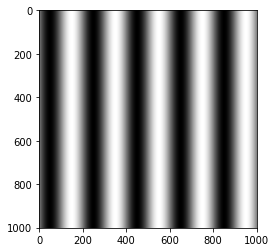

In [3]:
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
grating = np.sin(2 * np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating)
plt.show()

In [ ]:
# implement adaptive filter
def adaptive_filter(x, y, mu, N):
    M = x.shape[0]
    X = np.zeros((M, N), dtype=np.complex128)
    W = np.zeros((M, N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            X[m, n] = x[m, n] * np.exp(-2j * np.pi * n * m / M)
    for n in range(N):
        for m in range(M):
            W[m, n] = np.conj(X[m, n]) / (np.abs(X[m, n]) ** 2)
    Y = np.zeros((M, N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            Y[m, n] = y[m, n] * np.exp(-2j * np.pi * n * m / M)
    Z = np.zeros((M, N), dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            Z[m, n] = W[m, n] * Y[m, n]
    z = np.zeros(M, dtype=np.complex128)
    for m in range(M):
        for n in range(N):
            z[m] += Z[m, n] * np.exp(2j * np.pi * n * m / M)
    return z